In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from PIL import Image

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def save_reference_pose(image_path, pose_name):
    image = Image.open(image_path)
    image_rgb = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        reference_landmarks = np.array([[lm.x, lm.y, lm.z] for lm in results.pose_landmarks.landmark])
        np.save(f'{pose_name}_pose.npy', reference_landmarks)
        print(f"Reference landmarks for {pose_name} saved successfully.")
    else:
        print(f"Could not detect pose landmarks for {pose_name}.")

pose_images = {
    "downdog": "/content/drive/MyDrive/DATASET/TEST/downdog/00000000.jpg",
    "goddess": "/content/drive/MyDrive/DATASET/TEST/goddess/00000000.jpg",
    "plank": "/content/drive/MyDrive/DATASET/TEST/plank/00000000.jpg",
    "tree": "/content/drive/MyDrive/DATASET/TEST/tree/00000000.jpg",
    "warrior2": "/content/drive/MyDrive/DATASET/TEST/warrior2/00000000.jpg"
}

for pose_name, image_path in pose_images.items():
    save_reference_pose(image_path, pose_name)


Reference landmarks for downdog saved successfully.
Reference landmarks for goddess saved successfully.
Reference landmarks for plank saved successfully.
Reference landmarks for tree saved successfully.
Reference landmarks for warrior2 saved successfully.


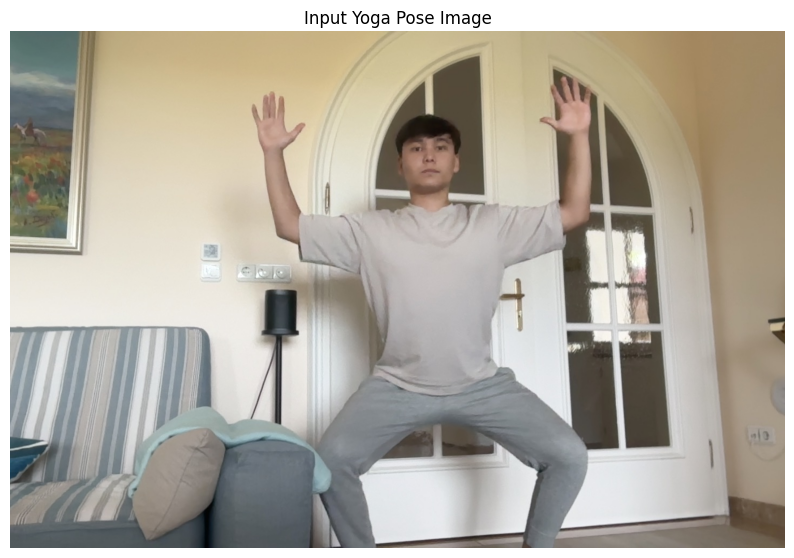

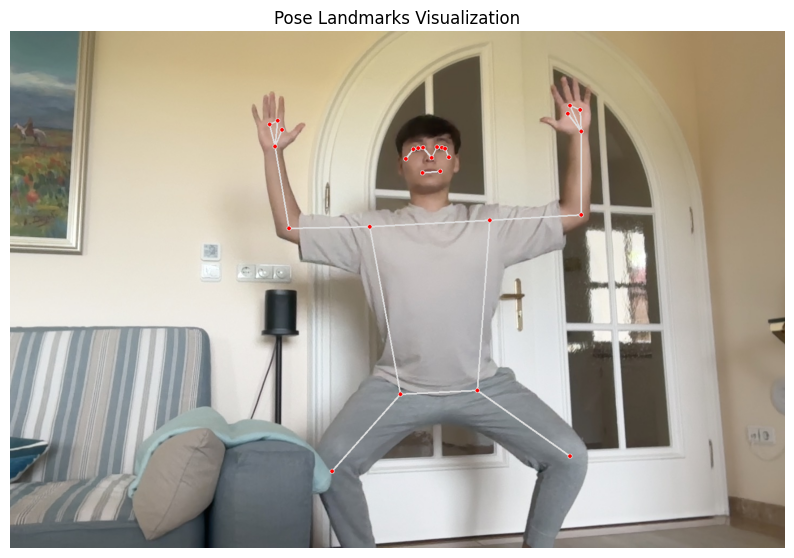

Correct goddess pose! Pose difference: 0.16271628887859424
Correct pose! Score: 10, Streak: 1


In [30]:
!pip install mediapipe opencv-python

import numpy as np
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

goddess_landmarks = np.load('/content/goddess_pose.npy')

file_path = '/content/yoga_image.jpg'

image = cv2.imread(file_path)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Input Yoga Pose Image")
plt.axis('off')
plt.show()

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.7, min_tracking_confidence=0.7)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)

if results.pose_landmarks:
    user_landmarks = np.array([[lm.x, lm.y, lm.z] for lm in results.pose_landmarks.landmark])

    annotated_image = image.copy()
    mp.solutions.drawing_utils.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.title("Pose Landmarks Visualization")
    plt.axis('off')
    plt.show()

else:
    print("Pose landmarks could not be detected.")
    user_landmarks = None

def calculate_pose_diff(user_landmarks, reference_landmarks, weights=None):
    diffs = np.linalg.norm(user_landmarks - reference_landmarks, axis=1)
    if weights is not None:
        diffs *= weights
    return np.mean(diffs)

weights = np.ones(33)

pose_name = "goddess"
if user_landmarks is not None:
    pose_diff = calculate_pose_diff(user_landmarks, goddess_landmarks, weights)

    threshold = 0.18
    if pose_diff < threshold:
        print(f"Correct {pose_name} pose! Pose difference: {pose_diff}")
    else:
        print(f"Adjust your {pose_name} pose. Pose difference: {pose_diff}")
else:
    print(f"Could not compare pose as no landmarks were detected.")

score = 0
streak = 0

def update_score(pose_diff, threshold=0.18):
    global score, streak
    if pose_diff < threshold:
        streak += 1
        score += 10
        print(f"Correct pose! Score: {score}, Streak: {streak}")
    else:
        streak = 0
        print(f"Incorrect pose. Score: {score}, Streak reset.")

if user_landmarks is not None:
    update_score(pose_diff)
